In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("../data/raw/colibactin_depths.csv", index_col=0)
df

,1000_S256_depth.tsv,1004_S266_depth.tsv,1017_S191_depth.tsv,1054_S222_depth.tsv,1059_S233_depth.tsv,1065_S245_depth.tsv,1066_S257_depth.tsv,106_S118_depth.tsv,1071_S267_depth.tsv,1078_S268_depth.tsv,...,magic-6592_S217_depth.tsv,magic-6593_S229_depth.tsv,magic-6594_S241_depth.tsv,magic-6595_S253_depth.tsv,magic-6597_S265_depth.tsv,magic-6598_S277_depth.tsv,magic-6599_S288_depth.tsv,magic-6600_S361_depth.tsv,Positive_494_S296_depth.tsv,Postive-Control_S107_depth.tsv
1,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
2,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
3,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
4,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
5,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
50701,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
50702,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0
50703,0,0.0,0,0,0.0,0,1,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0,0.0,0,0


Text(0.5, 0, 'PKS gene cluster coverage (%)')

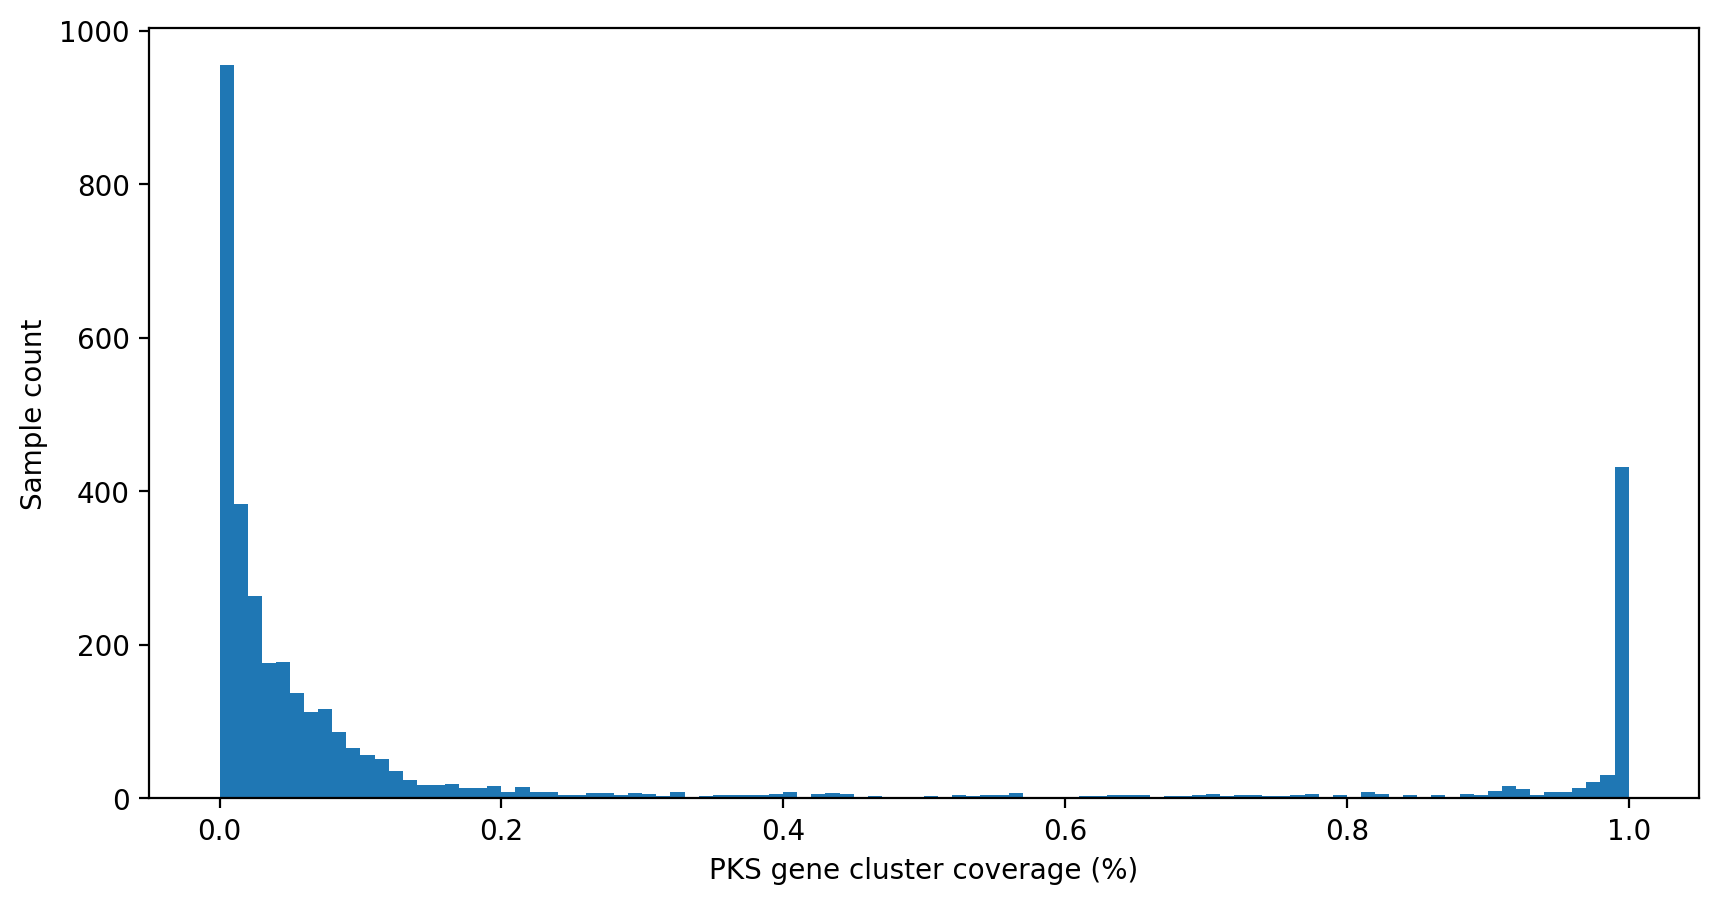

In [44]:
plt.figure(figsize=(10, 5), dpi=200)
(df > 0).mean(axis=0).plot.hist(bins=100)
plt.ylabel("Sample count")
plt.xlabel("PKS gene cluster coverage (%)")

In [45]:
colibactin_genes = pd.read_csv("../data/raw/colibactin_genes.tsv", header=None, sep="\t").iloc[:, [2, 3, 4, 8]]
colibactin_genes.columns = ["type", "start", "stop", "name"]
colibactin_genes = colibactin_genes[colibactin_genes["type"] == "gene"]
colibactin_genes["gene_name"] = colibactin_genes["name"].apply(lambda x : x.split("=")[1].split()[0])
colibactin_genes = colibactin_genes.sort_values("start")
colibactin_genes = colibactin_genes.set_index("gene_name")
colibactin_genes

,type,start,stop,name
gene_name,,,,
clbS,gene,1,513,Name=clbS gene
clbQ,gene,548,1270,Name=clbQ gene
clbP,gene,1263,2777,Name=clbP gene
clbO,gene,2790,5249,Name=clbO gene
clbN,gene,5280,9647,Name=clbN gene
clbM,gene,9644,11083,Name=clbM gene
clbL,gene,11145,12608,Name=clbL gene
clbK,gene,12601,19065,Name=clbK gene
clbJ,gene,19076,25576,Name=clbJ gene


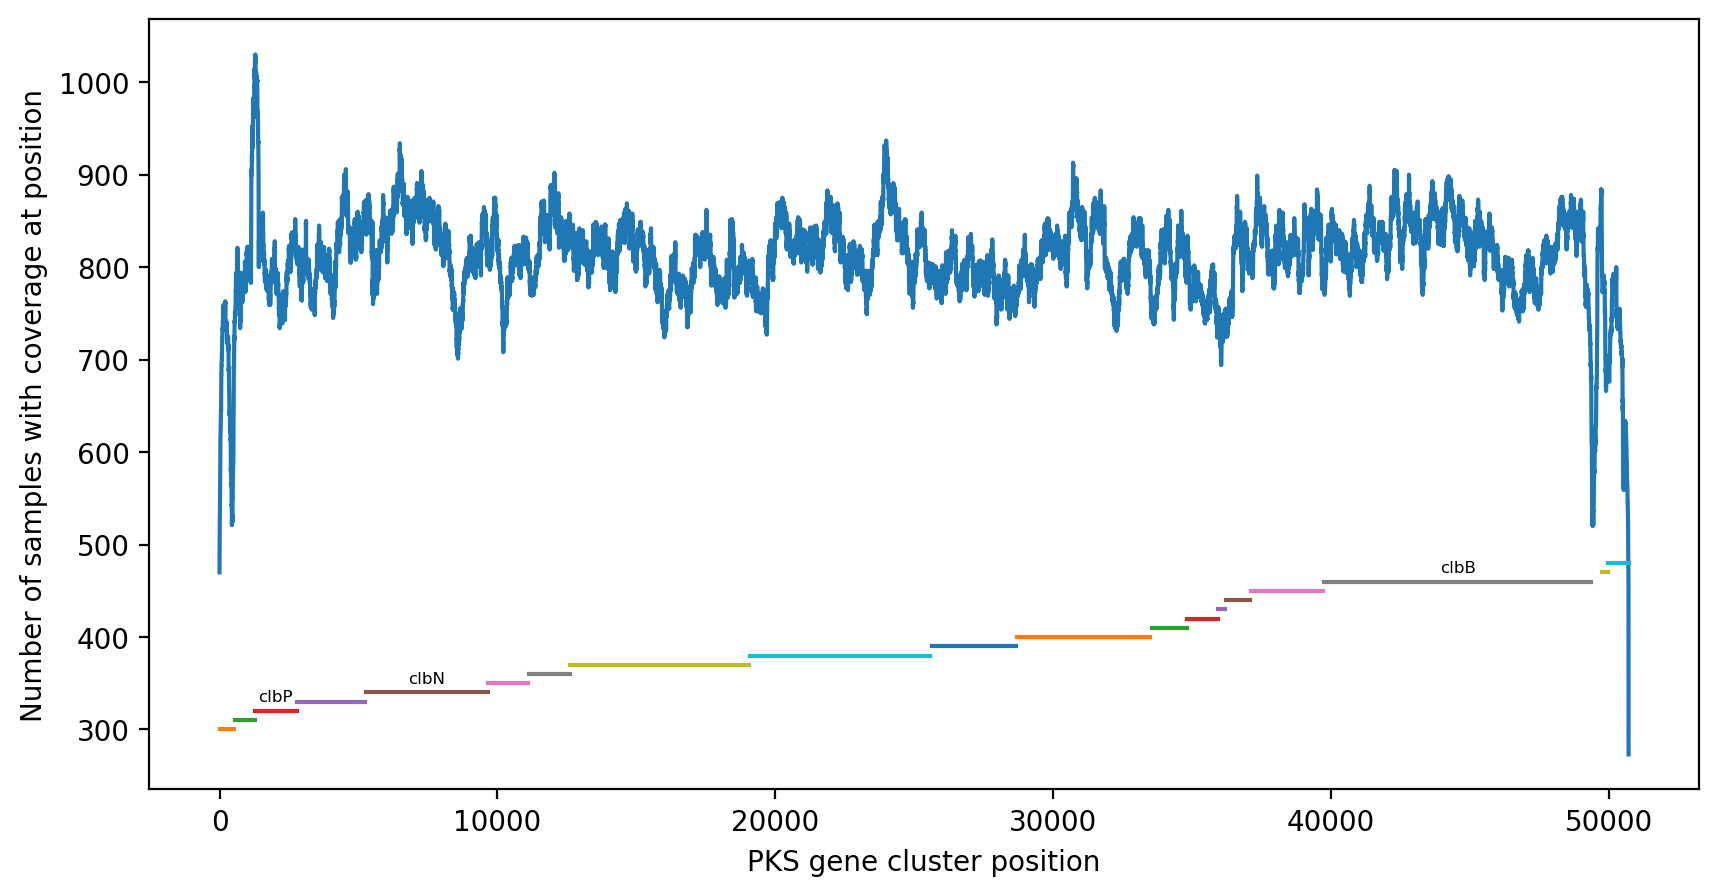

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5), dpi=200)
plt.plot(np.arange(df.shape[0]), (df > 0).sum(axis=1))
plt.ylabel("Number of samples with coverage at position")
plt.xlabel("PKS gene cluster position")

markers = ["clbN", "clbB", "clbP"]

for i, gene in enumerate(colibactin_genes.index):
    start = colibactin_genes.loc[gene, "start"]
    stop = colibactin_genes.loc[gene, "stop"]
    y = 300 + i * 10
    p = plt.plot([start, stop], [y, y], label=gene)
    if gene in markers:
        plt.text((start + stop) / 2, y + 10, gene, horizontalalignment='center', fontsize=6)

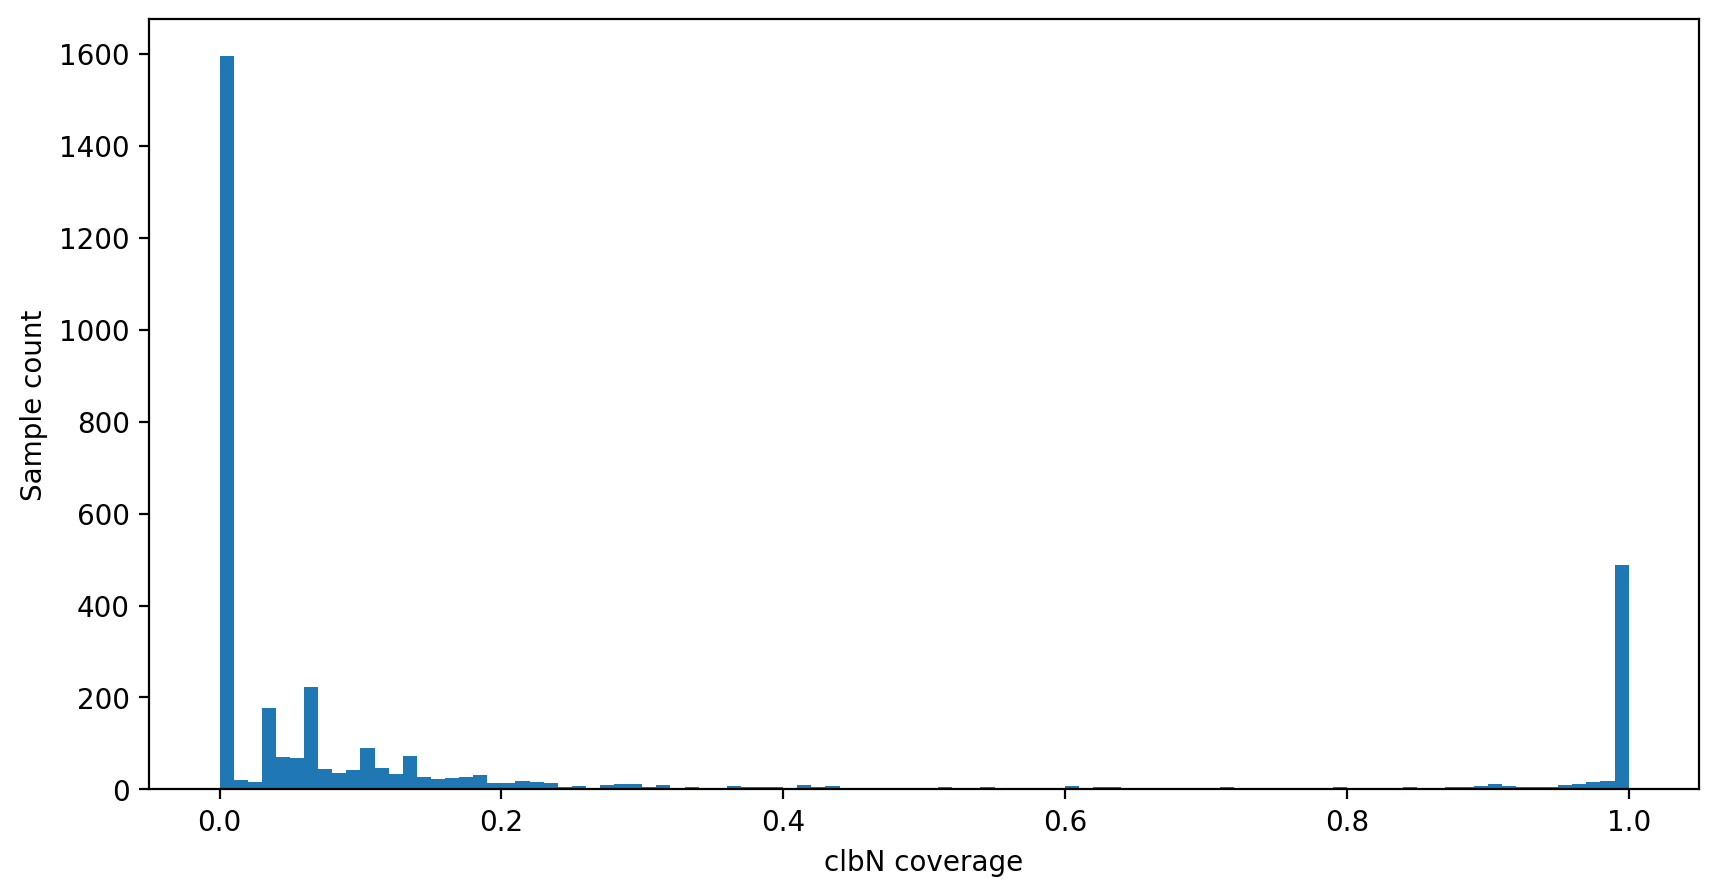

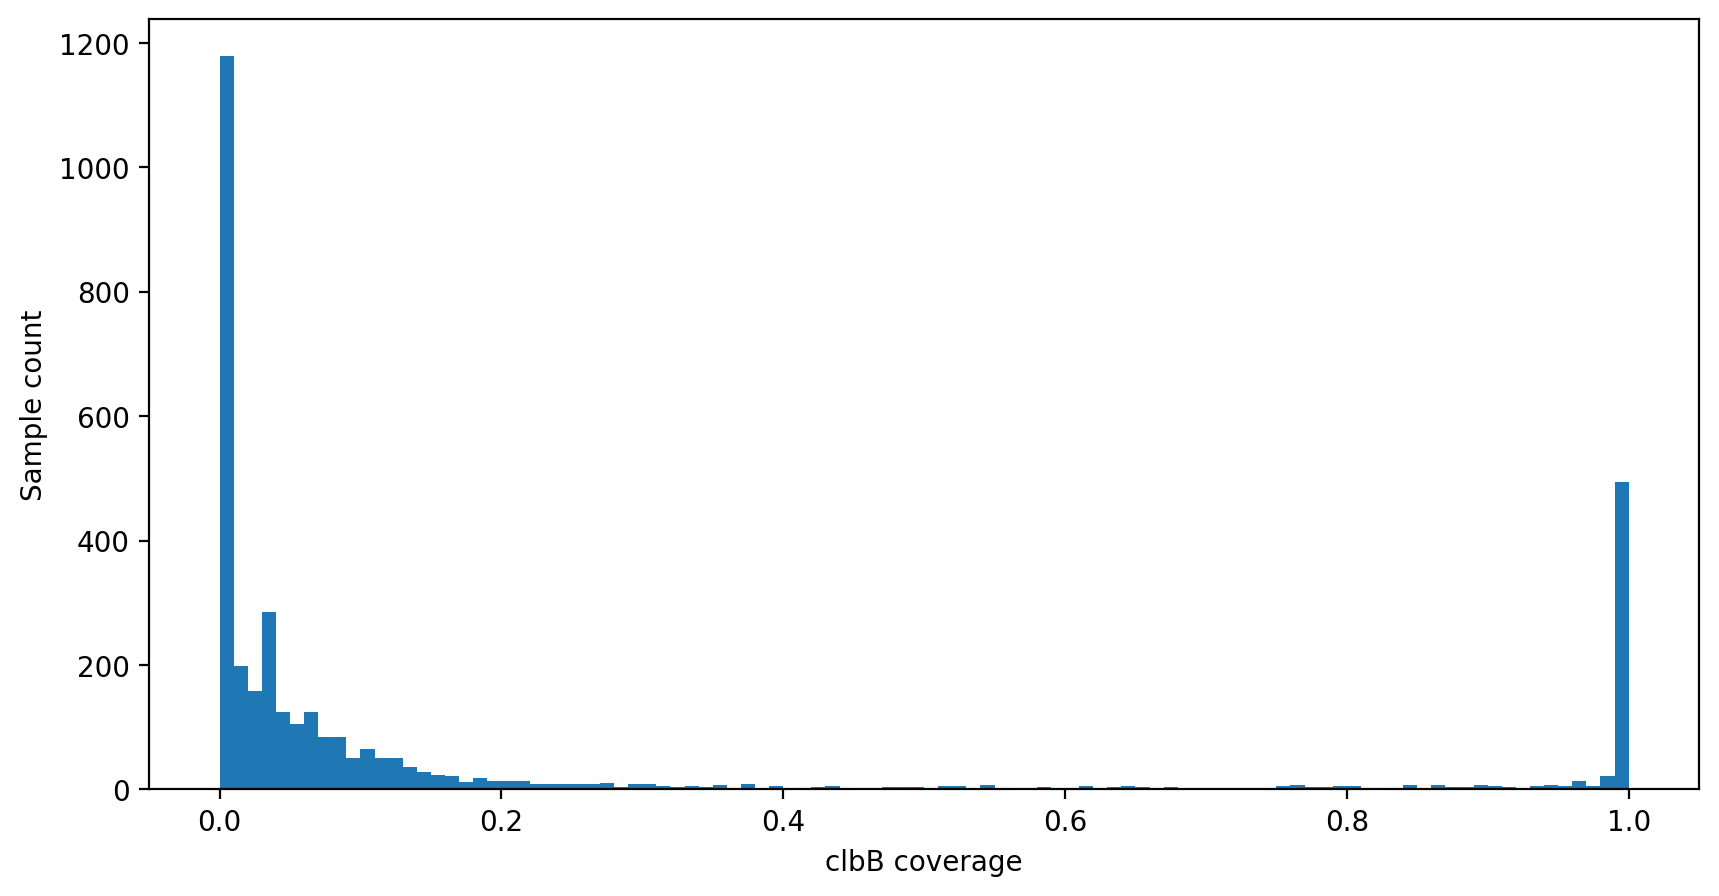

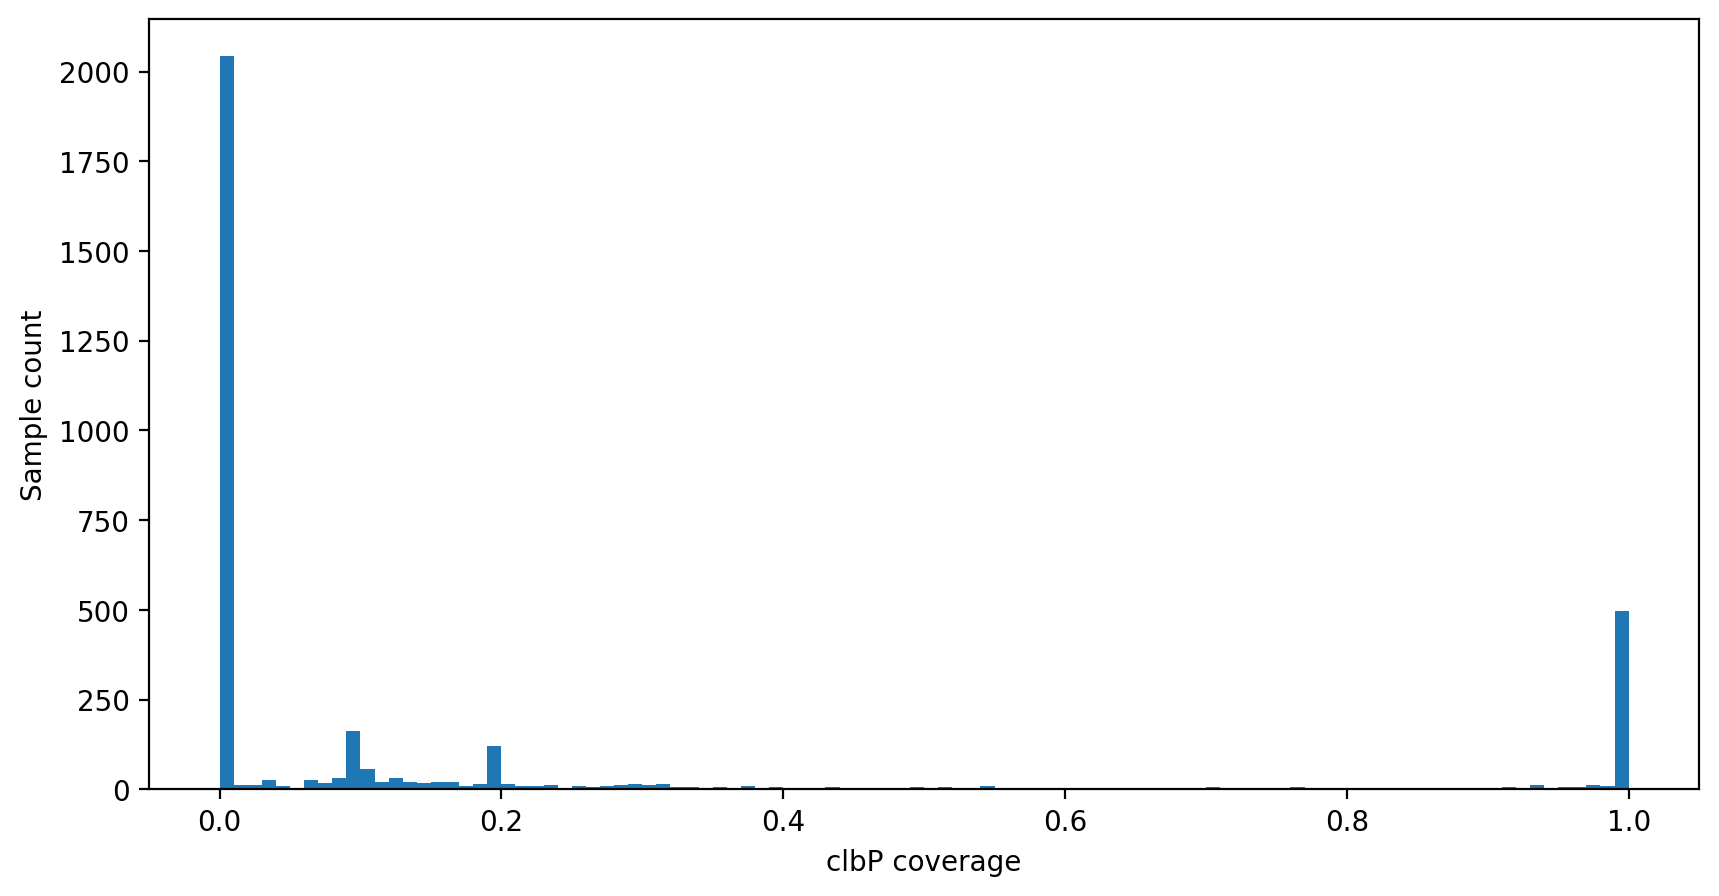

In [107]:
for m in markers:
    start = colibactin_genes.loc[m, "start"]
    stop = colibactin_genes.loc[m, "stop"]
    marker_df = df.iloc[start:stop, :]
    coverage = (marker_df > 0).mean(axis=0)
    plt.figure(figsize=(10, 5), dpi=200)
    plt.hist(coverage, bins=100)
    plt.ylabel("Sample count")
    plt.xlabel(f"{m} coverage")
    plt.show()

In [51]:
window = int(df.shape[0] / 10)
slices = [(start, start + window) for start in np.arange(0, df.shape[0], window)][:-1]
slices

[(0, 5070),
 (5070, 10140),
 (10140, 15210),
 (15210, 20280),
 (20280, 25350),
 (25350, 30420),
 (30420, 35490),
 (35490, 40560),
 (40560, 45630),
 (45630, 50700)]

In [56]:
bin_coverages = [(df > 0).iloc[s[0]:s[1], :].sum(axis=0) > 0 for s in slices]
num_bins_covered = pd.concat(sums, axis=1).sum(axis=1)
num_bins_covered

1000_S256_depth.tsv                5
1004_S266_depth.tsv                0
1017_S191_depth.tsv                5
1054_S222_depth.tsv                2
1059_S233_depth.tsv                0
                                  ..
magic-6598_S277_depth.tsv          9
magic-6599_S288_depth.tsv         10
magic-6600_S361_depth.tsv          0
Positive_494_S296_depth.tsv        5
Postive-Control_S107_depth.tsv     3
Length: 3608, dtype: int64

In [84]:
(num_bins_covered == 10).sum()

1098

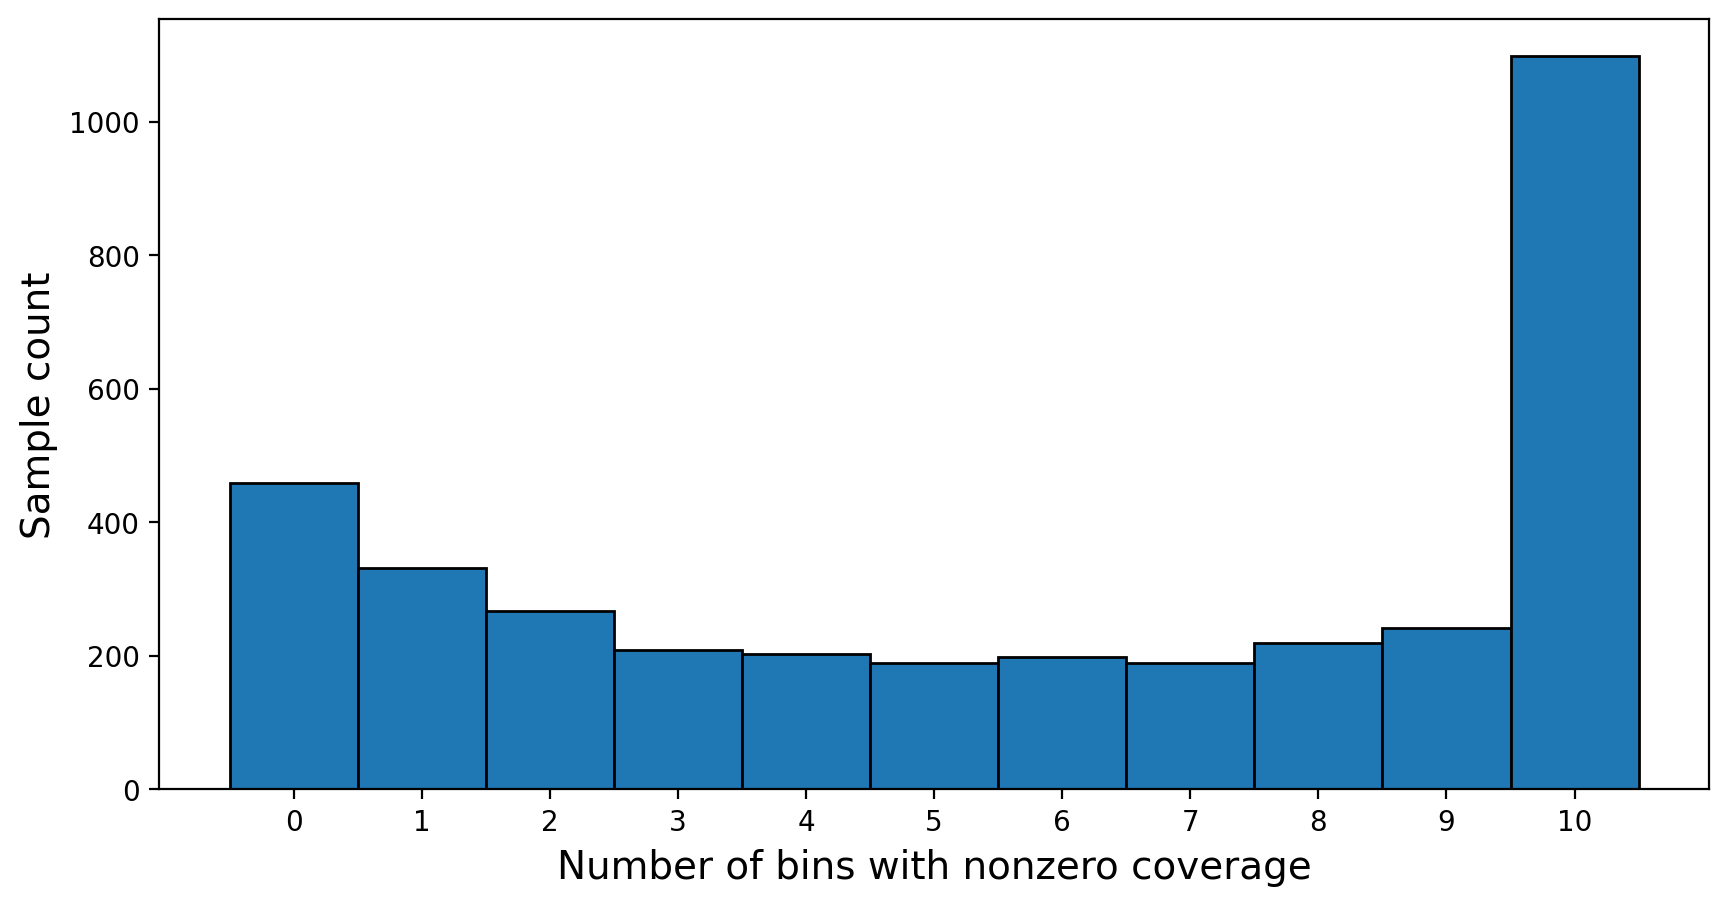

In [87]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(num_bins_covered, edgecolor="k", bins=range(12))

plt.ylabel("Sample count", fontsize=14)
plt.xlabel("Number of bins with nonzero coverage", fontsize=14)
plt.xticks(np.arange(0.5, 11, 1), labels=range(0, 11))

plt.show()

In [135]:
coverage_stats = pd.DataFrame([num_bins_covered, (df > 0).mean(axis=0), df.mean(axis=0)], index=["Bins", "Percent coverage", "Average coverage"])
coverage_stats

,1000_S256_depth.tsv,1004_S266_depth.tsv,1017_S191_depth.tsv,1054_S222_depth.tsv,1059_S233_depth.tsv,1065_S245_depth.tsv,1066_S257_depth.tsv,106_S118_depth.tsv,1071_S267_depth.tsv,1078_S268_depth.tsv,...,magic-6592_S217_depth.tsv,magic-6593_S229_depth.tsv,magic-6594_S241_depth.tsv,magic-6595_S253_depth.tsv,magic-6597_S265_depth.tsv,magic-6598_S277_depth.tsv,magic-6599_S288_depth.tsv,magic-6600_S361_depth.tsv,Positive_494_S296_depth.tsv,Postive-Control_S107_depth.tsv
Bins,5.000000,0.0,5.000000,2.00000,0.0,4.000000,10.000000,0.0,0.0,4.000000,...,1.000000,1.000000,1.000000,0.0,0.0,9.000000,10.000000,0.0,5.000000,3.000000
Percent coverage,0.023253,0.0,0.022148,0.00497,0.0,0.010019,0.994971,0.0,0.0,0.020373,...,0.005956,0.003077,0.005956,0.0,0.0,0.186179,0.075556,0.0,0.037788,0.015837
Average coverage,0.029564,0.0,0.034790,0.00497,0.0,0.012425,8.422393,0.0,0.0,0.027237,...,0.011912,0.005956,0.005956,0.0,0.0,0.284356,0.127031,0.0,0.044632,0.017395


In [136]:
colibactin_genes

,type,start,stop,name
gene_name,,,,
clbS,gene,1,513,Name=clbS gene
clbQ,gene,548,1270,Name=clbQ gene
clbP,gene,1263,2777,Name=clbP gene
clbO,gene,2790,5249,Name=clbO gene
clbN,gene,5280,9647,Name=clbN gene
clbM,gene,9644,11083,Name=clbM gene
clbL,gene,11145,12608,Name=clbL gene
clbK,gene,12601,19065,Name=clbK gene
clbJ,gene,19076,25576,Name=clbJ gene


In [137]:
markers = ["clbN", "clbB", "clbP"]

marker_presence = {}

for i, gene in enumerate(colibactin_genes.index):
    start = colibactin_genes.loc[gene, "start"]
    stop = colibactin_genes.loc[gene, "stop"]
    if gene not in markers: continue
    marker_df = df.iloc[start - 1:stop, :]
    nonzero_coverage = (marker_df > 0).sum(axis=0) > 0
    
    marker_presence[gene] = nonzero_coverage

marker_presence_df = pd.DataFrame(marker_presence).T
marker_presence_df

,1000_S256_depth.tsv,1004_S266_depth.tsv,1017_S191_depth.tsv,1054_S222_depth.tsv,1059_S233_depth.tsv,1065_S245_depth.tsv,1066_S257_depth.tsv,106_S118_depth.tsv,1071_S267_depth.tsv,1078_S268_depth.tsv,...,magic-6592_S217_depth.tsv,magic-6593_S229_depth.tsv,magic-6594_S241_depth.tsv,magic-6595_S253_depth.tsv,magic-6597_S265_depth.tsv,magic-6598_S277_depth.tsv,magic-6599_S288_depth.tsv,magic-6600_S361_depth.tsv,Positive_494_S296_depth.tsv,Postive-Control_S107_depth.tsv
clbP,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
clbN,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
clbB,True,False,True,True,False,True,True,False,False,False,...,True,True,False,False,False,True,True,False,True,False


In [138]:
coverage_stats = pd.concat([coverage_stats, marker_presence_df])
coverage_stats

,1000_S256_depth.tsv,1004_S266_depth.tsv,1017_S191_depth.tsv,1054_S222_depth.tsv,1059_S233_depth.tsv,1065_S245_depth.tsv,1066_S257_depth.tsv,106_S118_depth.tsv,1071_S267_depth.tsv,1078_S268_depth.tsv,...,magic-6592_S217_depth.tsv,magic-6593_S229_depth.tsv,magic-6594_S241_depth.tsv,magic-6595_S253_depth.tsv,magic-6597_S265_depth.tsv,magic-6598_S277_depth.tsv,magic-6599_S288_depth.tsv,magic-6600_S361_depth.tsv,Positive_494_S296_depth.tsv,Postive-Control_S107_depth.tsv
Bins,5.000000,0.0,5.000000,2.00000,0.0,4.000000,10.000000,0.0,0.0,4.000000,...,1.000000,1.000000,1.000000,0.0,0.0,9.000000,10.000000,0.0,5.000000,3.000000
Percent coverage,0.023253,0.0,0.022148,0.00497,0.0,0.010019,0.994971,0.0,0.0,0.020373,...,0.005956,0.003077,0.005956,0.0,0.0,0.186179,0.075556,0.0,0.037788,0.015837
Average coverage,0.029564,0.0,0.034790,0.00497,0.0,0.012425,8.422393,0.0,0.0,0.027237,...,0.011912,0.005956,0.005956,0.0,0.0,0.284356,0.127031,0.0,0.044632,0.017395
clbP,0.000000,0.0,1.000000,0.00000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000
clbN,0.000000,0.0,0.000000,0.00000,0.0,0.000000,1.000000,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.000000
clbB,1.000000,0.0,1.000000,1.00000,0.0,1.000000,1.000000,0.0,0.0,0.000000,...,1.000000,1.000000,0.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.000000


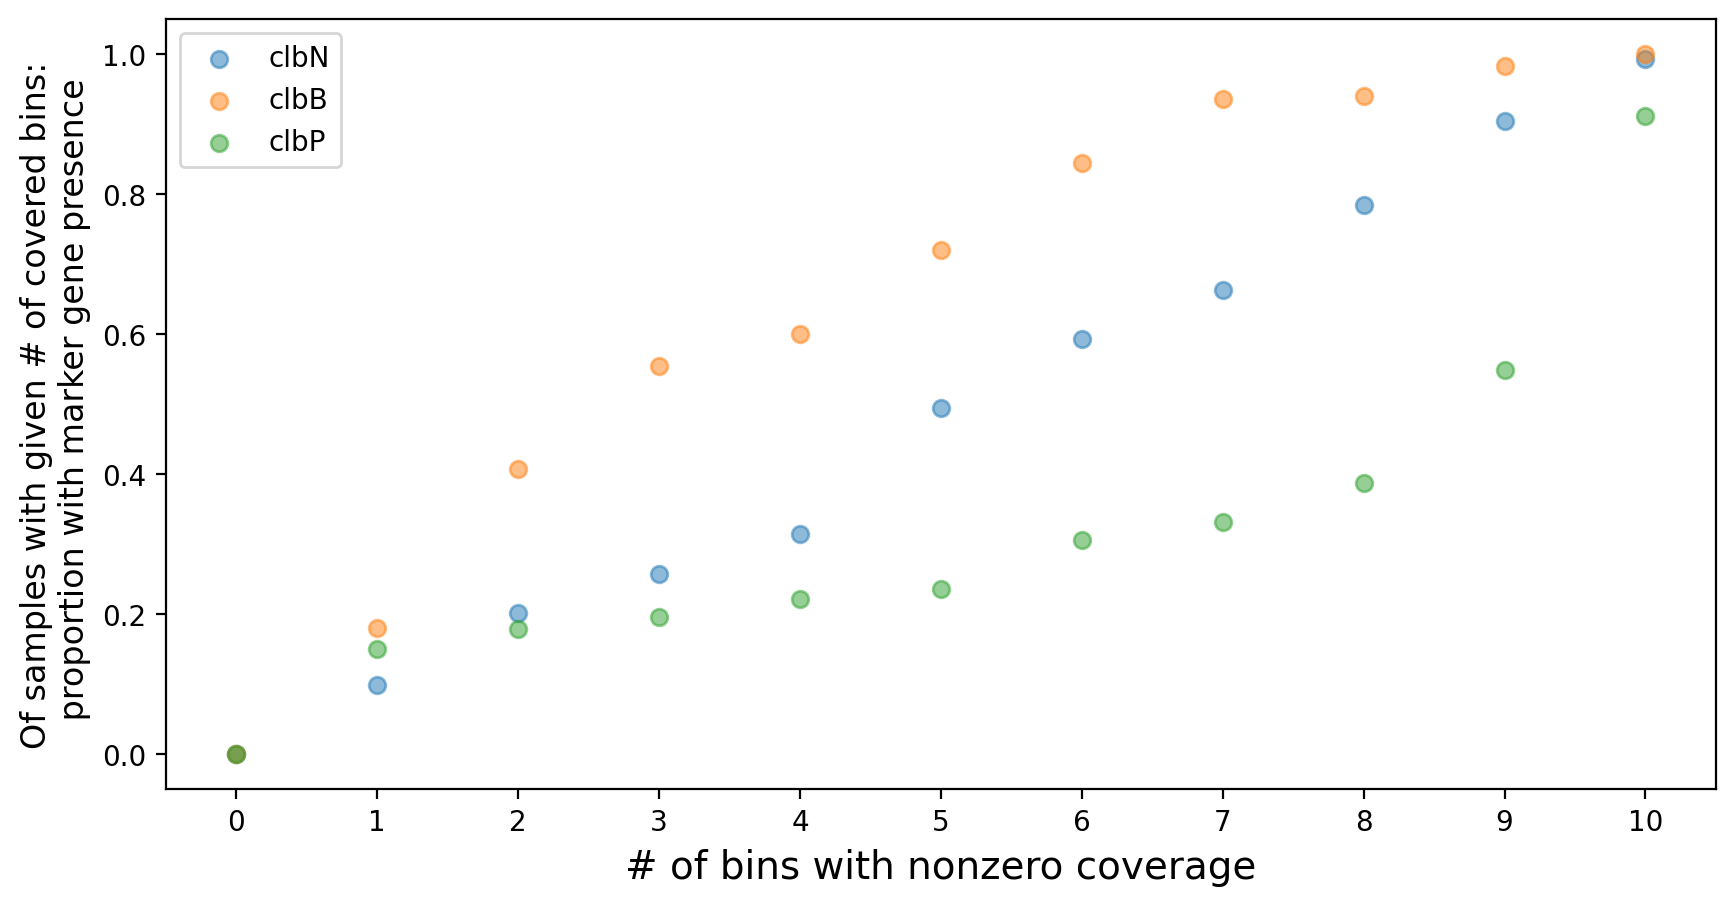

In [184]:
cov_t = coverage_stats.T

bin_marker_info = {}

for i in range(11):
    bin_marker_info[i] = cov_t[cov_t["Bins"] == i][markers].mean(axis=0)

bin_marker_df = pd.DataFrame(bin_marker_info).T

plt.figure(figsize=(10, 5), dpi=200)

for m in markers:
    plt.scatter(bin_marker_df.index, bin_marker_df[m], label=m, alpha=0.5)
    
plt.xticks(range(11))
plt.xlabel("# of bins with nonzero coverage", fontsize=14)
plt.ylabel("Of samples with given # of covered bins:\n proportion with marker gene presence", fontsize=12)
    
plt.legend()

In [178]:
cov_t[cov_t["Bins"] == 9]["clbB"].mean()

0.9834710743801653

In [139]:
coverage_stats.T.corr()

,Bins,Percent coverage,Average coverage,clbP,clbN,clbB
Bins,1.000000,0.651391,0.239663,0.638344,0.770526,0.755804
Percent coverage,0.651391,1.000000,0.459414,0.618872,0.514273,0.416845
Average coverage,0.239663,0.459414,1.000000,0.243749,0.189536,0.149107
clbP,0.638344,0.618872,0.243749,1.000000,0.470976,0.402694
clbN,0.770526,0.514273,0.189536,0.470976,1.000000,0.550556
clbB,0.755804,0.416845,0.149107,0.402694,0.550556,1.000000


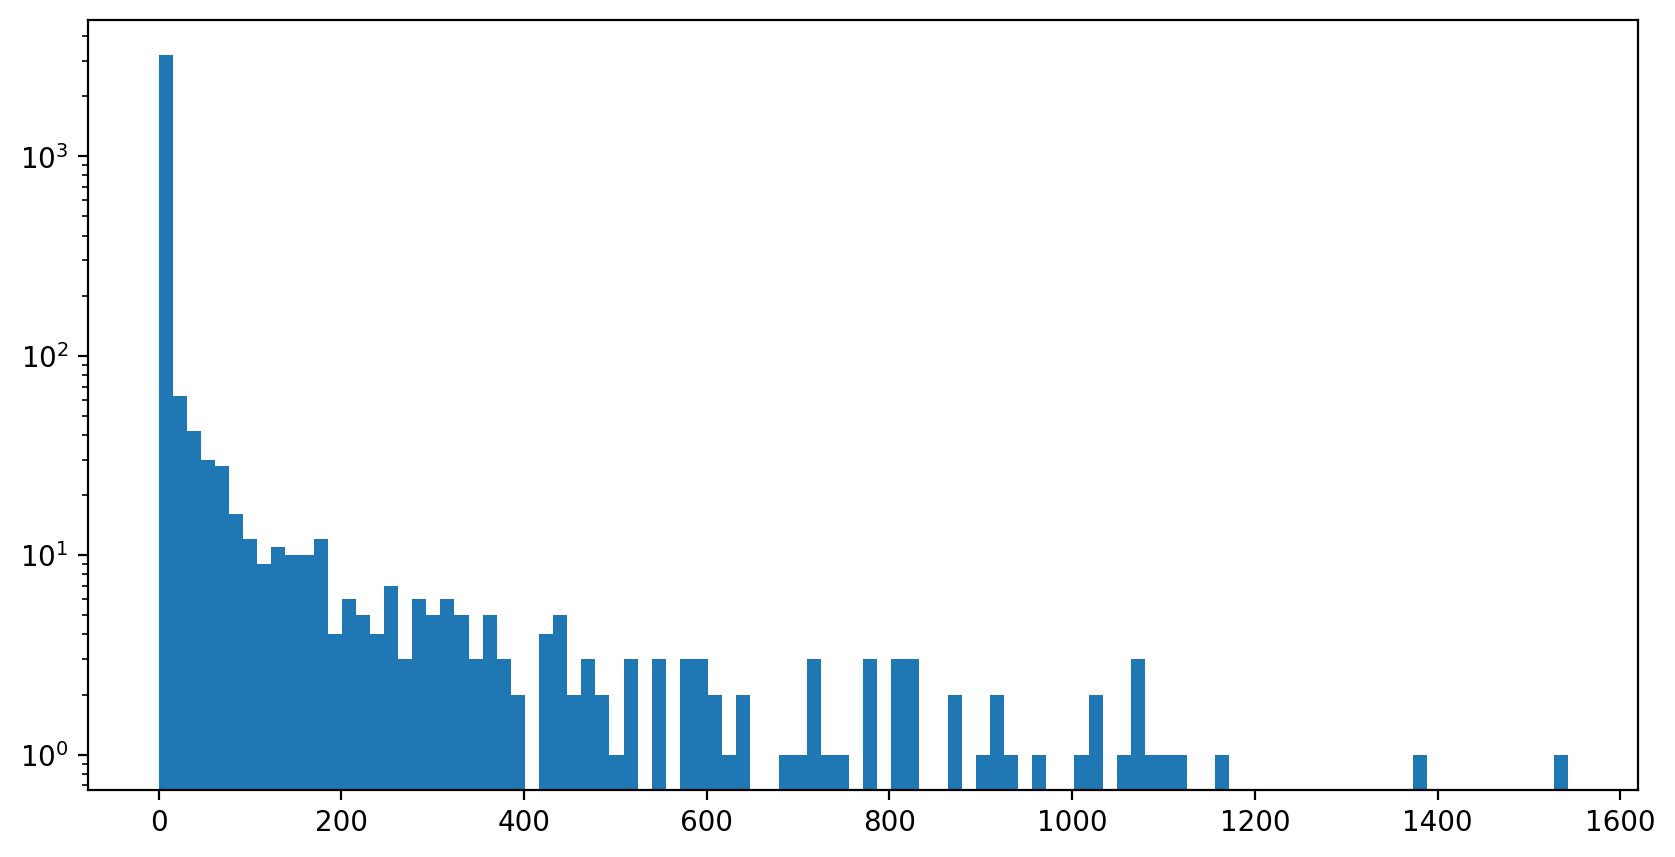

In [104]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(coverage_stats.loc["Average coverage"], bins=100)
plt.yscale("log")

plt.show()

In [208]:
import pickle

with open(os.path.join(config.CLEAN_DIR, "filename_to_id"), "rb") as f:
    f_to_id = pickle.load(f)
f_to_id

{'magic-0001_S22': 'magic.0001',
 'magic-0004_S34': 'magic.0004',
 'magic-0011_S46': 'magic.0011',
 'magic-0013_S58': 'magic.0013',
 'magic-0015_S70': 'magic.0015',
 'magic-0016_S82': 'magic.0016',
 'magic-0017_S94': 'magic.0017',
 'magic-0018_S106': 'magic.0018',
 'magic-0020_S23': 'magic.0020',
 'magic-0021_S35': 'magic.0021',
 'magic-0028_S47': 'magic.0028',
 'magic-0030_S59': 'magic.0030',
 'magic-0040_S71': 'magic.0040',
 'magic-0048_S83': 'magic.0048',
 'magic-0050_S95': 'magic.0050',
 'magic-0053_S24': 'magic.0053',
 'magic-0059_S36': 'magic.0059',
 'magic-0063_S48': 'magic.0063',
 'magic-0075_S60': 'magic.0075',
 'magic-0078_S72': 'magic.0078',
 'magic-0079_S84': 'magic.0079',
 'magic-0100_S96': 'magic.0100',
 'magic-0101_S108': 'magic.0101',
 'magic-0109_S25': 'magic.0109',
 'magic-0110_S37': 'magic.0110',
 'magic-0112_S49': 'magic.0112',
 'magic-0124_S61': 'magic.0124',
 'magic-0131_S73': 'magic.0131',
 'magic-0132_S85': 'magic.0132',
 'magic-0134_S97': 'magic.0134',
 'magic-

In [213]:
has_colibactin = coverage_stats.T[["Bins"]] == 10
has_colibactin.index = [x[:-10] for x in has_colibactin.index]
has_colibactin = has_colibactin.loc[[x for x in has_colibactin.index if x in f_to_id]]
has_colibactin.index = [f_to_id[x] for x in has_colibactin.index]
has_colibactin

,Bins
magic.1000,False
magic.1004,False
magic.1017,False
magic.1054,False
magic.1059,False
...,...
magic.6595,False
magic.6597,False
magic.6598,False
magic.6599,True


In [214]:
import config
import os

has_colibactin.to_csv(os.path.join(config.CLEAN_DIR, "has_colibactin.to_csv"))